In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import imutils
import cv2
import opencv_jupyter_ui as jcv2

from glob import glob

In [151]:
from PIL import Image
from PIL.ExifTags import TAGS

In [3]:
sys.path.append("/Users/jorgemarpa/MyStuff/repos/image_raw/")
from image_raw.align_images import *

In [4]:
path = "/Users/jorgemarpa/Pictures/Lightroom/edits/annular_eclipse_timelapse_2023"

In [345]:
batch_num = 1
img_files = sorted(glob(f"{path}/batch_{batch_num:02}-*.jpg"))
len(img_files)

247

In [100]:
template = cv2.imread(img_files[0])
image = cv2.imread(img_files[-1])
print(template.shape, image.shape)

templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(templateGray.shape, imageGray.shape)

(4672, 7008, 3) (4672, 7008, 3)
(4672, 7008) (4672, 7008)


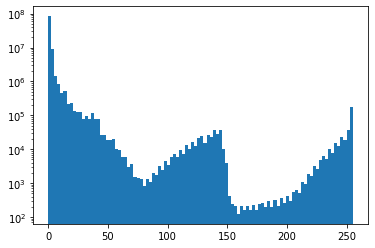

In [101]:
plt.hist(image.ravel(), bins=100, log=True)
plt.show()

In [102]:
np.percentile(template, [0,1,5,50,90,95,97,99,100])

array([  0.,   0.,   0.,   1.,   4.,   8.,  15.,  50., 255.])

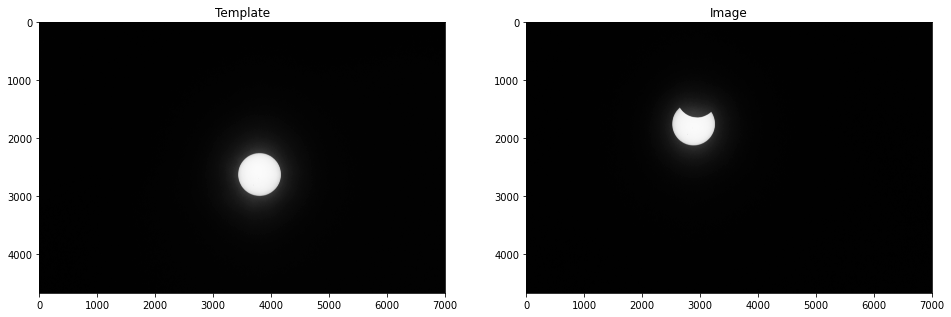

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(16, 9))
ax[0].set_title("Template")
ax[1].set_title("Image")
ax[0].imshow(templateGray, cmap="Greys_r")
ax[1].imshow(imageGray, cmap="Greys_r")
plt.show()

# Using the center and fixed size stamps

In [44]:
# display image with OpenCV and widgets
# this will show the full res image at 100%
# jcv2.imshow("image", img)

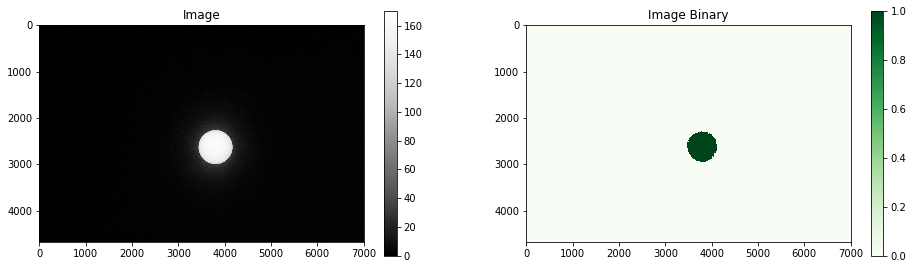

Using Image
737 736
737
[2629 3807]


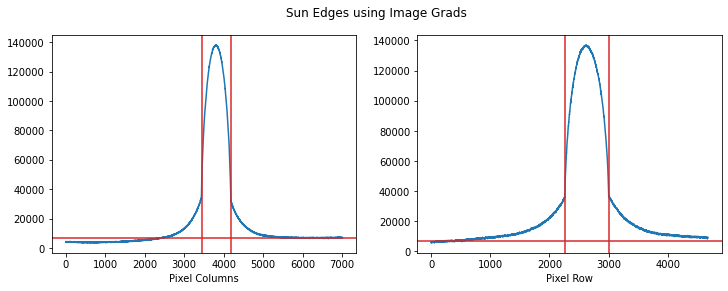

Using Binary Image
671 674
674
[2620 3803]


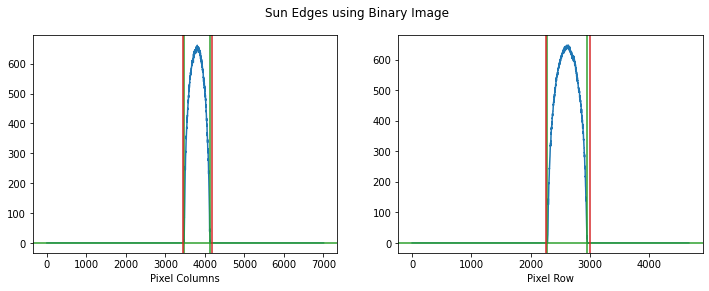

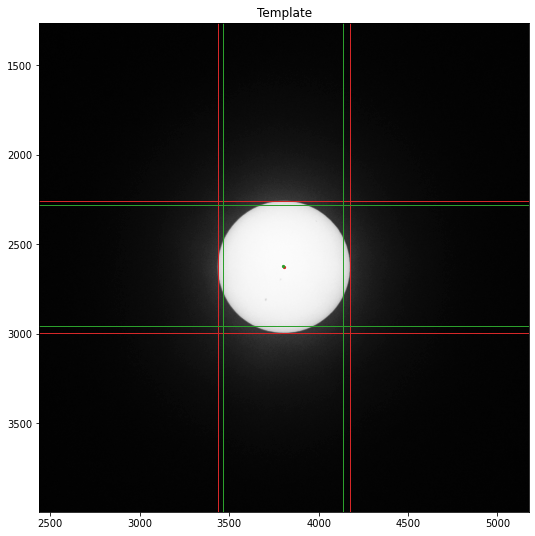

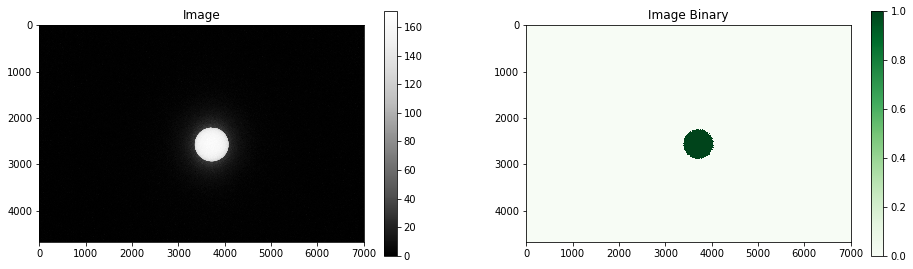

Using Image
738 725
738
[2583 3724]


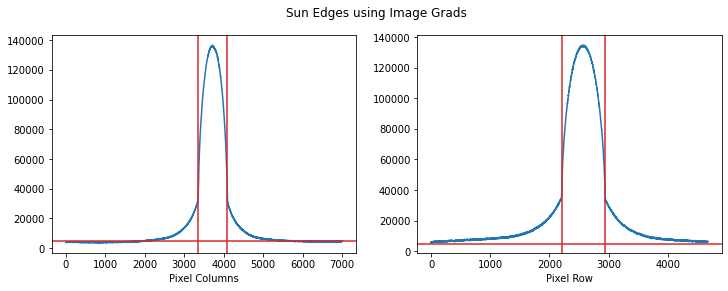

Using Binary Image
669 670
670
[2566 3720]


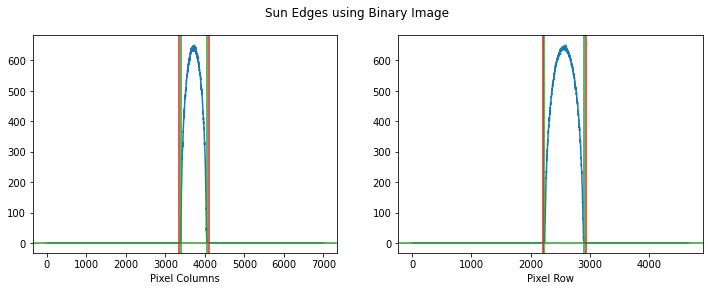

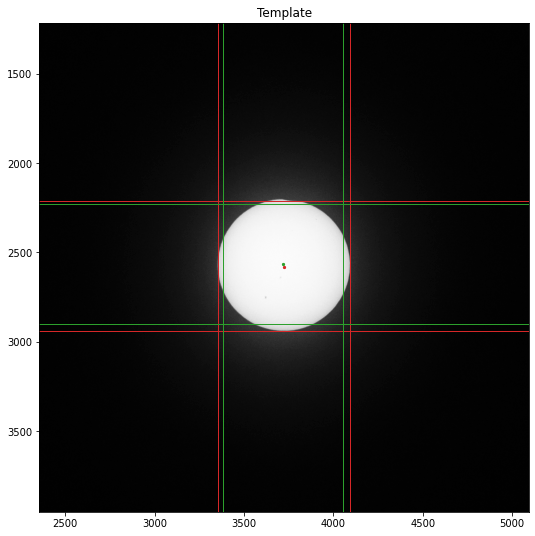

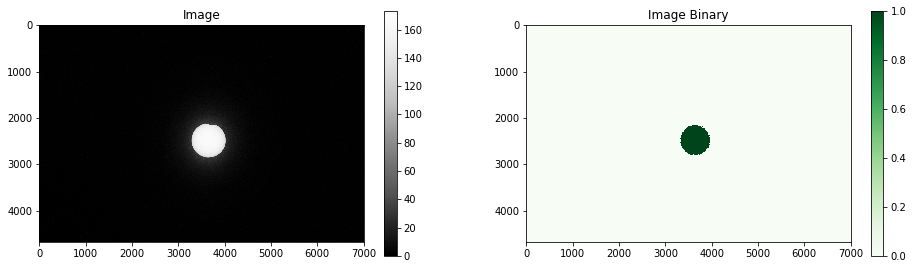

Using Image
736 706
736
[2515 3657]


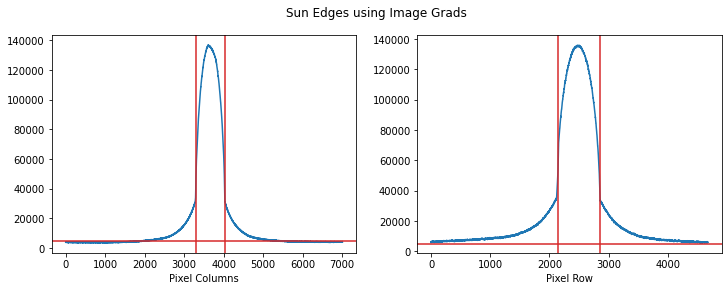

Using Binary Image
665 664
665
[2480 3652]


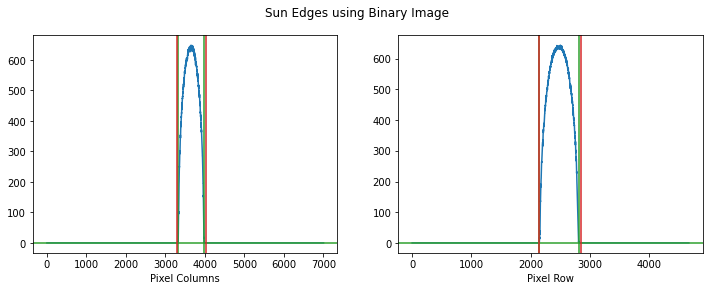

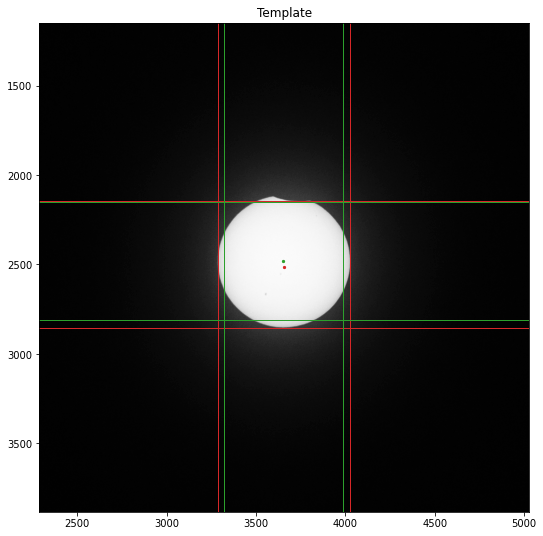

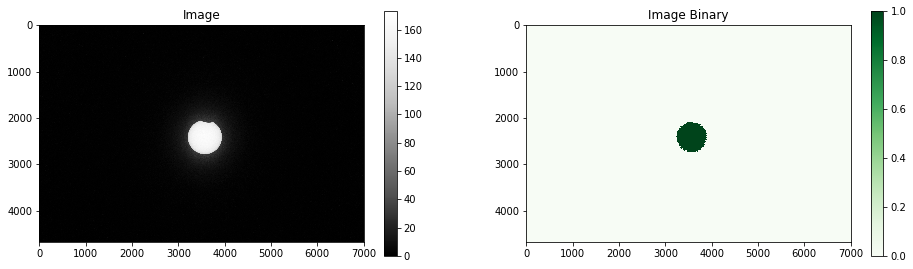

Using Image
737 681
737
[2468 3577]


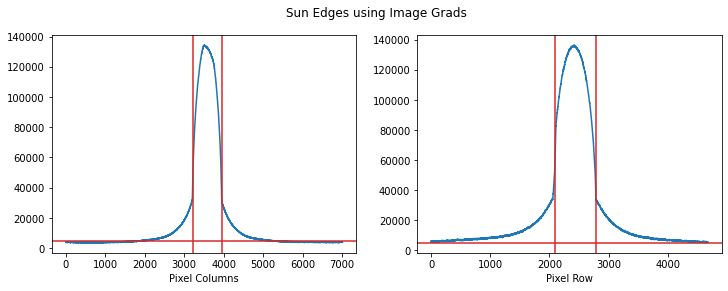

Using Binary Image
669 673
673
[2413 3576]


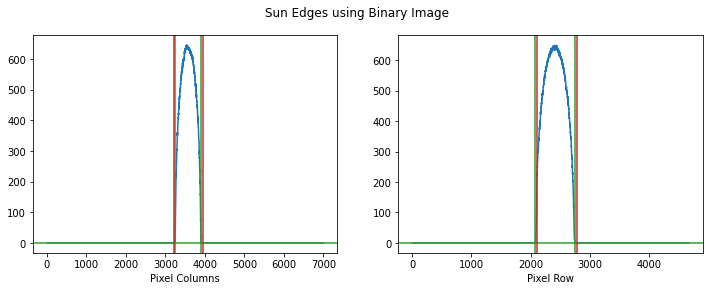

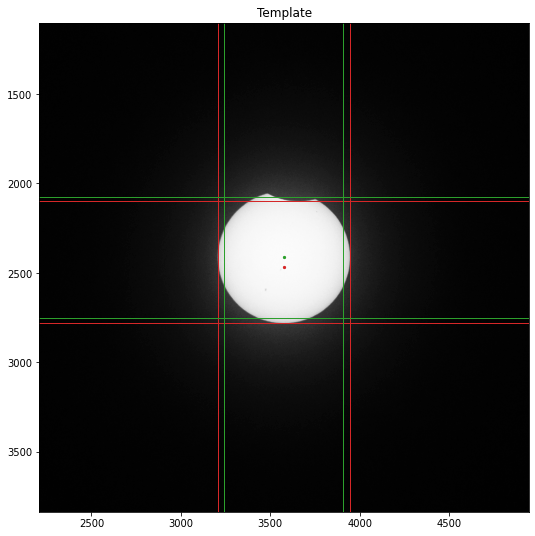

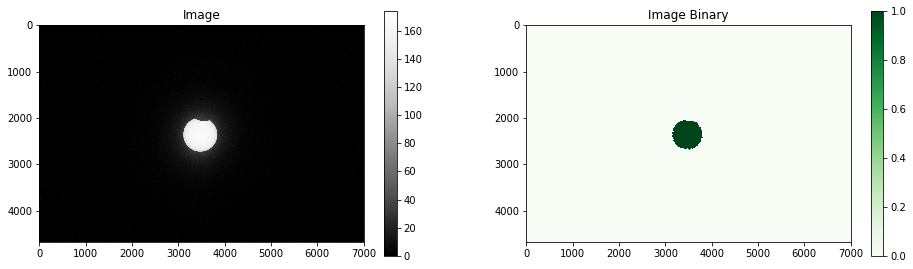

Using Image
736 660
736
[2434 3478]


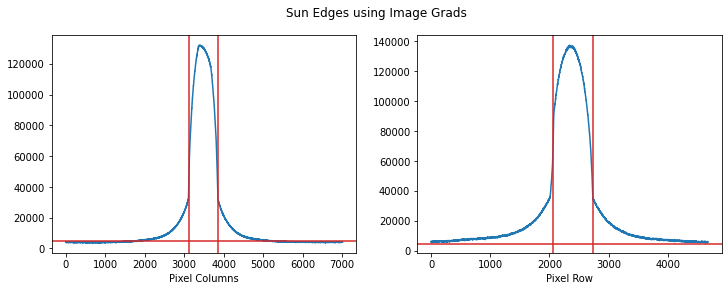

Using Binary Image
674 659
674
[2372 3476]


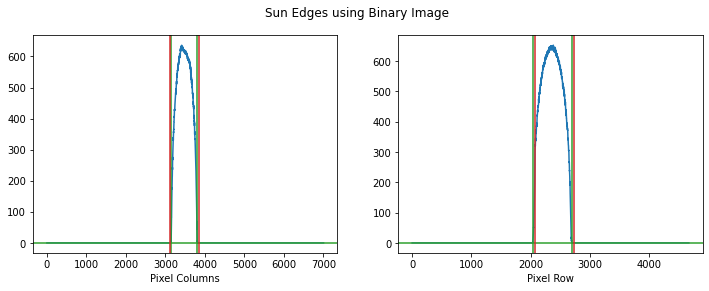

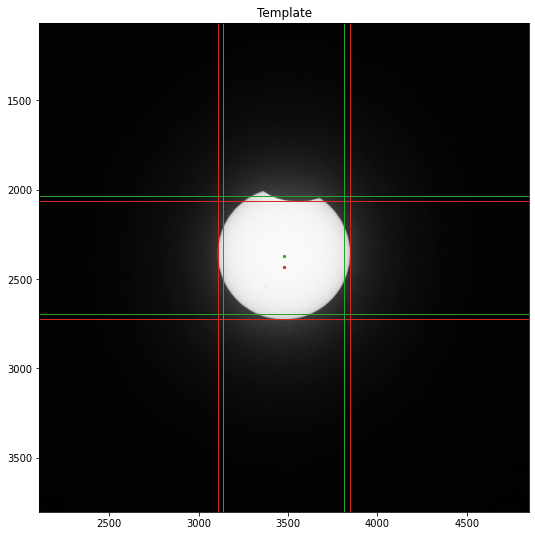

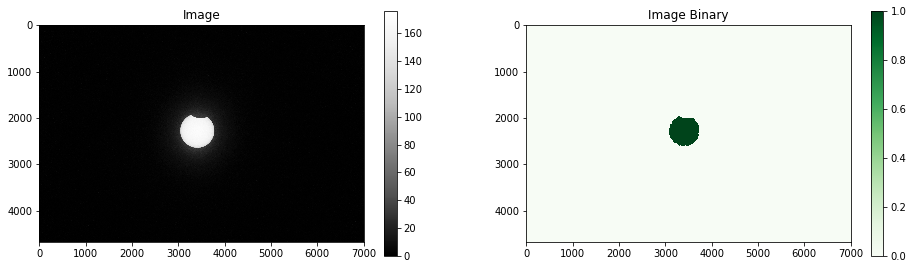

Using Image
737 638
737
[2373 3412]


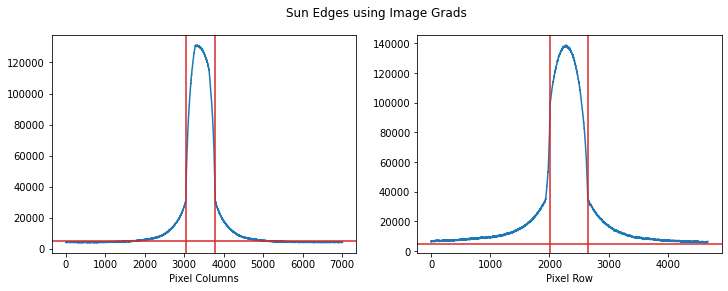

Using Binary Image
674 651
674
[2299 3412]


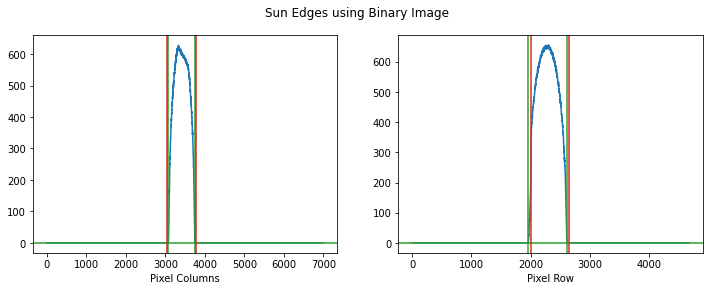

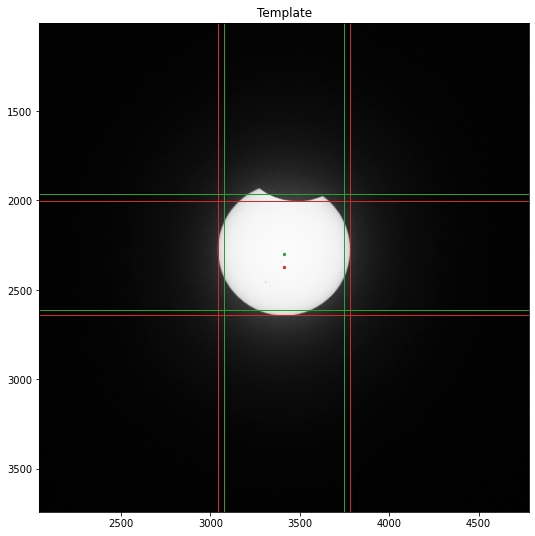

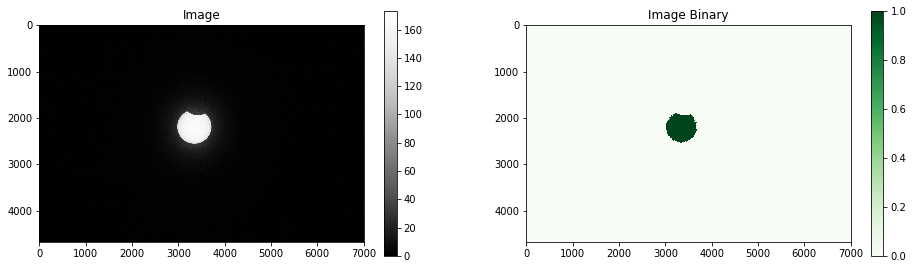

Using Image
732 618
732
[2304 3349]


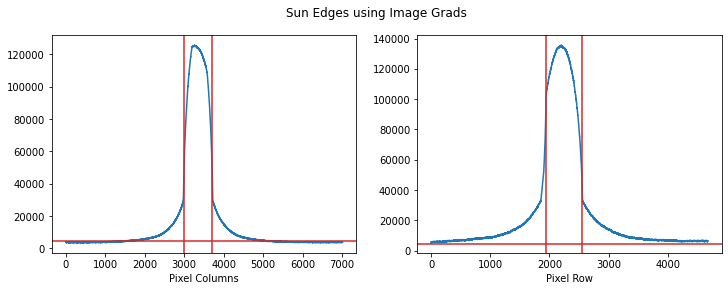

Using Binary Image
681 655
681
[2220 3349]


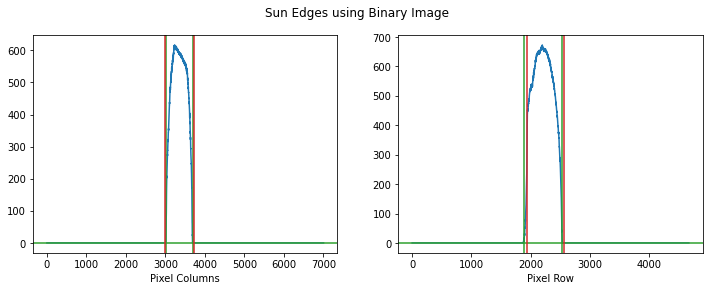

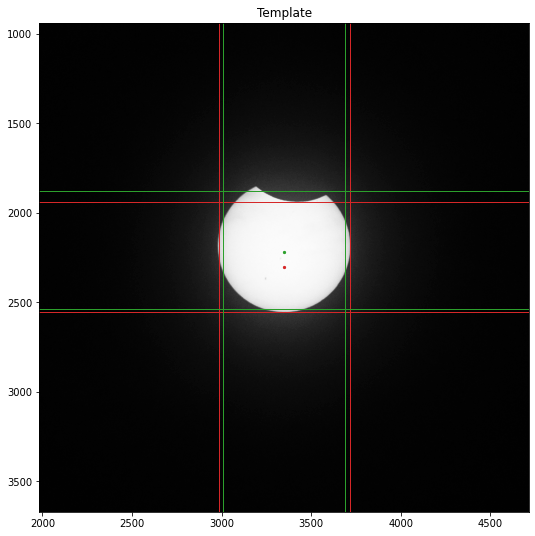

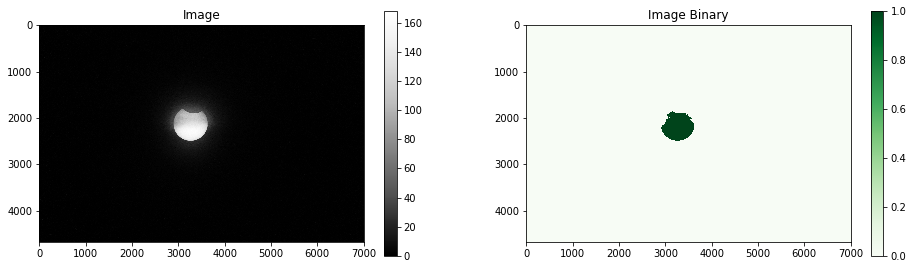

Using Image
733 595
733
[2264 3268]


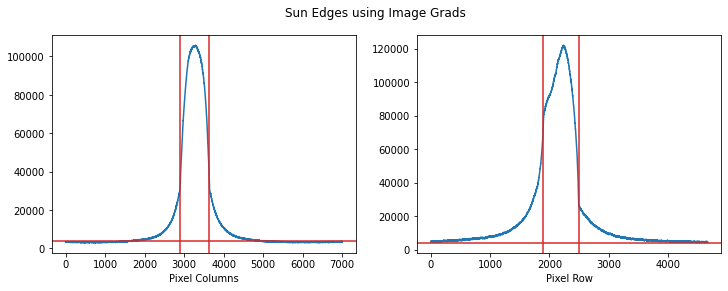

Using Binary Image
718 647
718
[2204 3275]


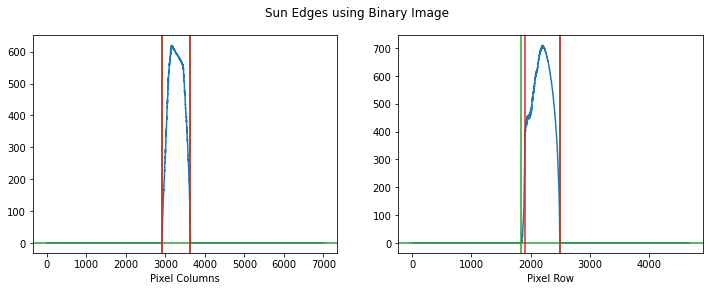

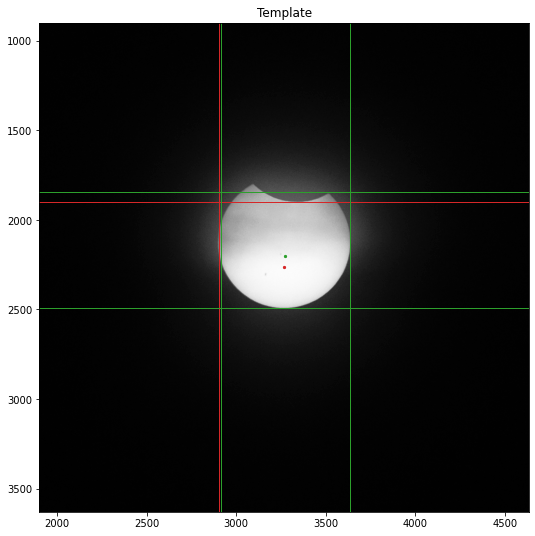

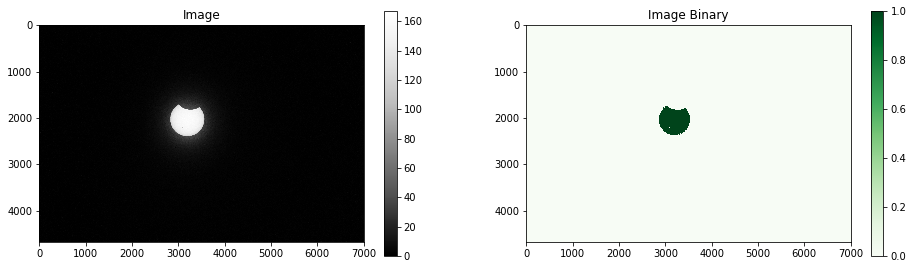

Using Image
736 572
736
[2189 3198]


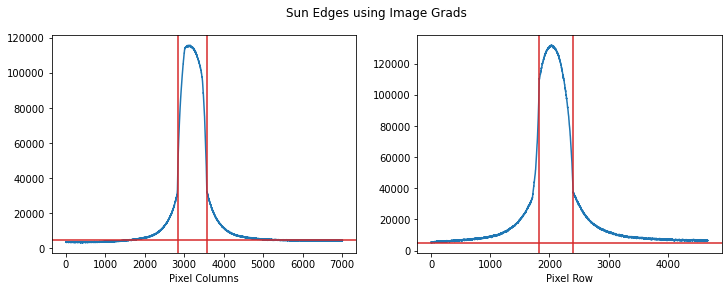

Using Binary Image
694 646
694
[2078 3199]


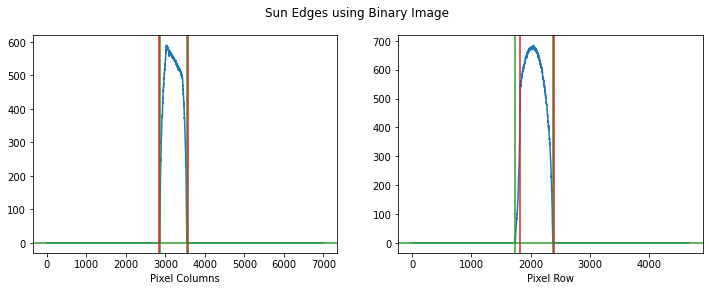

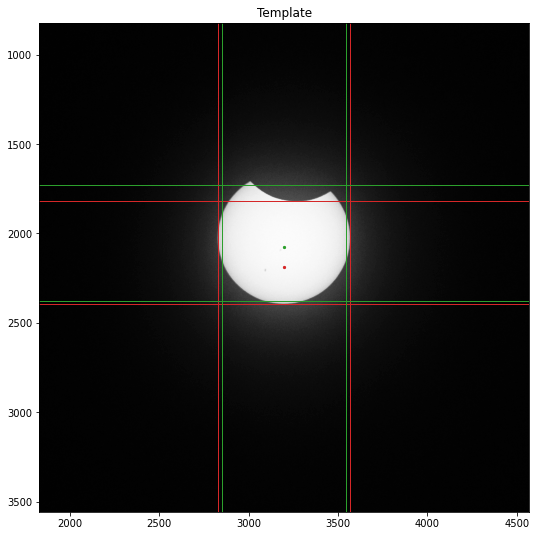

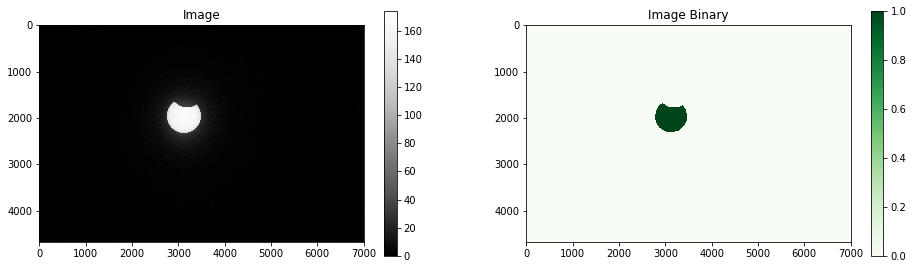

Using Image
735 553
735
[2139 3123]


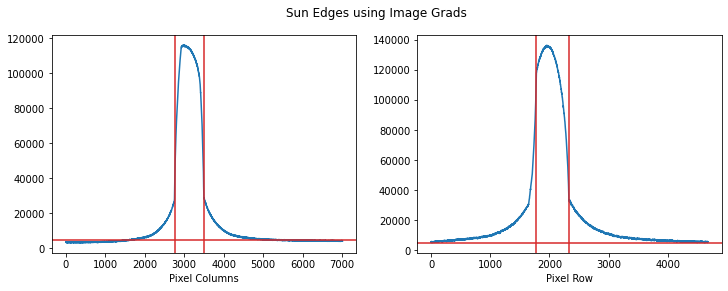

Using Binary Image
700 640
700
[2022 3126]


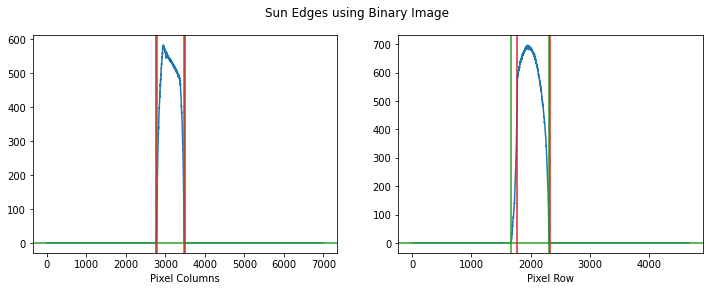

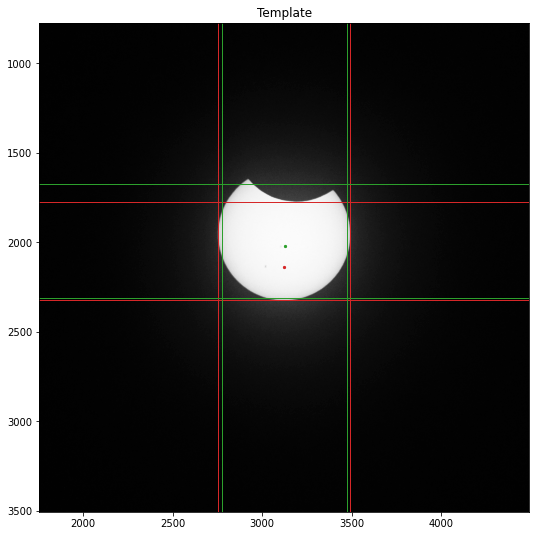

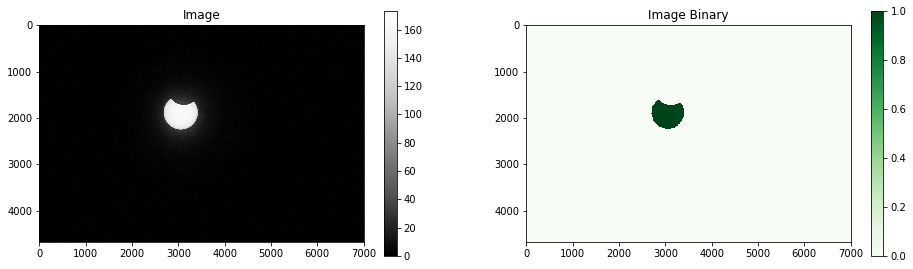

Using Image
739 531
739
[2086 3057]


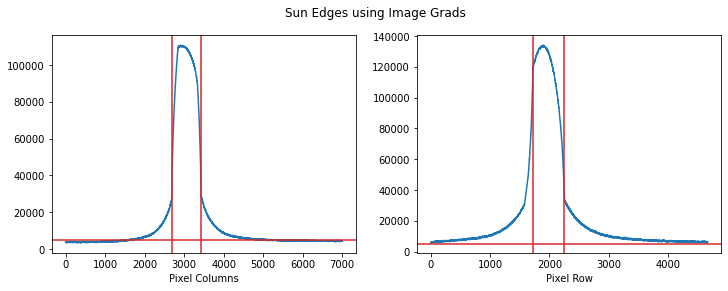

Using Binary Image
714 643
714
[1957 3058]


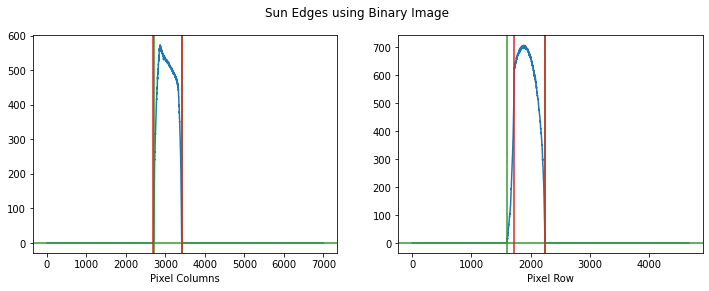

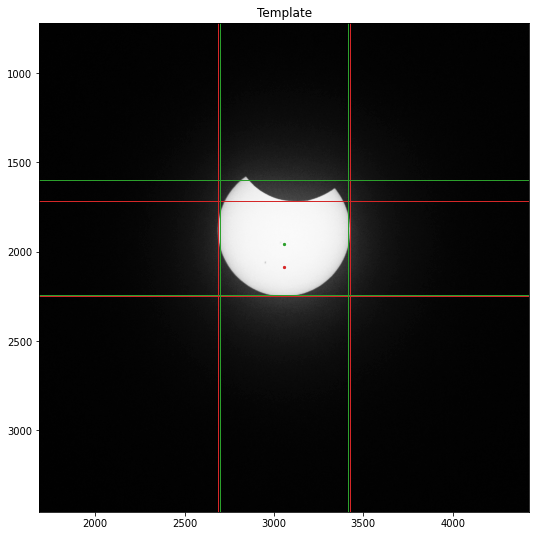

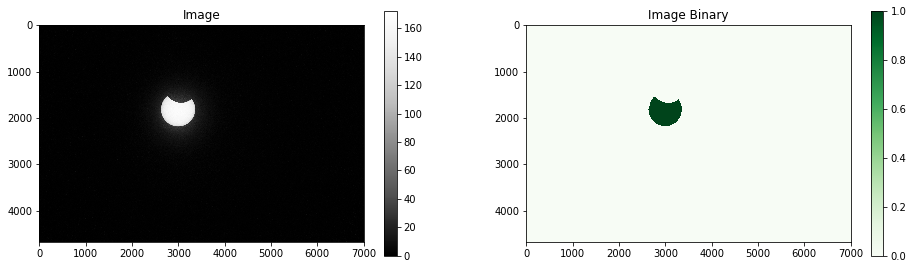

Using Image
734 510
734
[2039 2999]


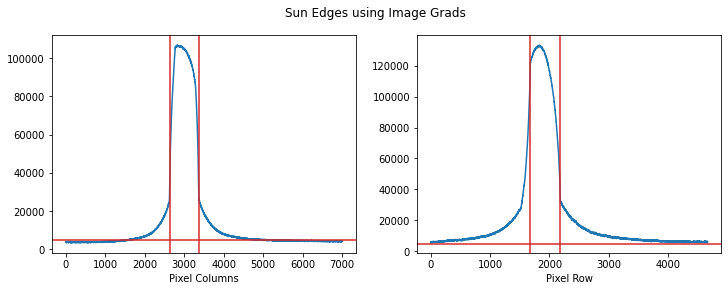

Using Binary Image
722 641
722
[1898 3001]


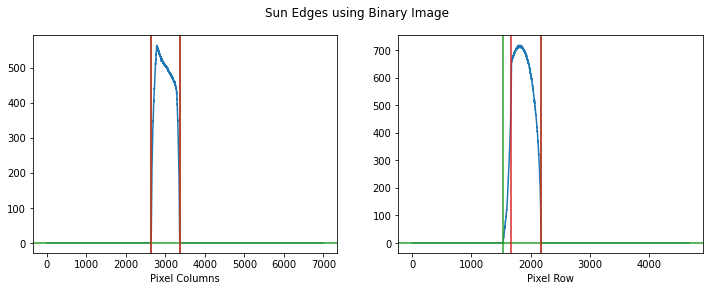

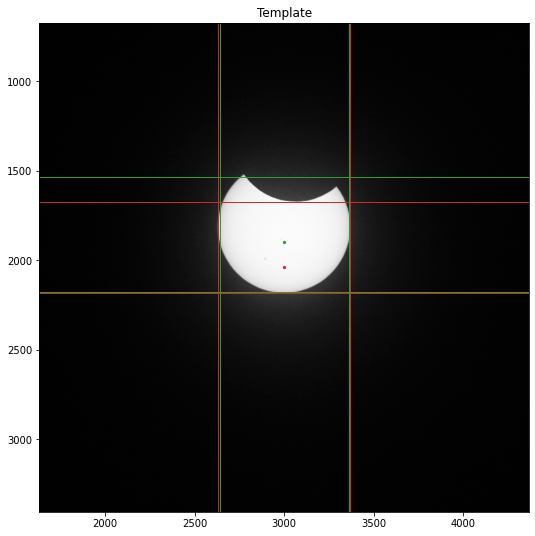

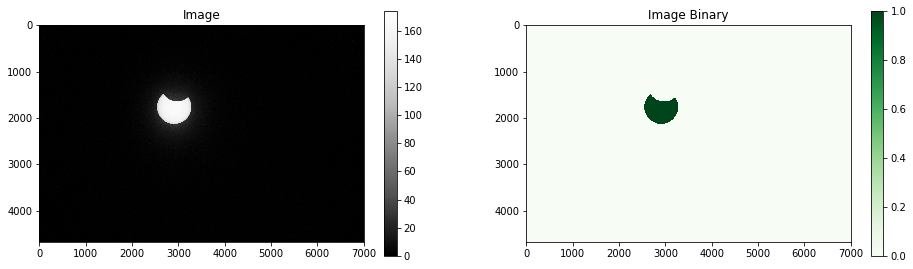

Using Image
738 486
738
[2011 2915]


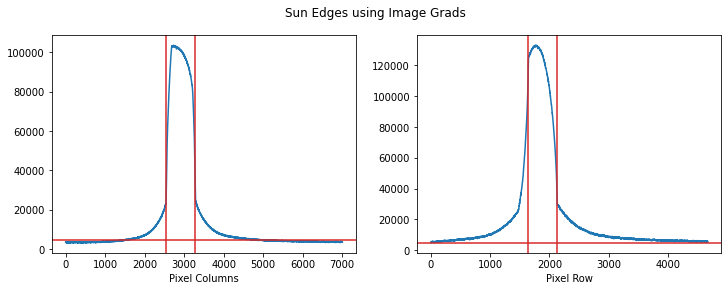

Using Binary Image
730 643
730
[1850 2915]


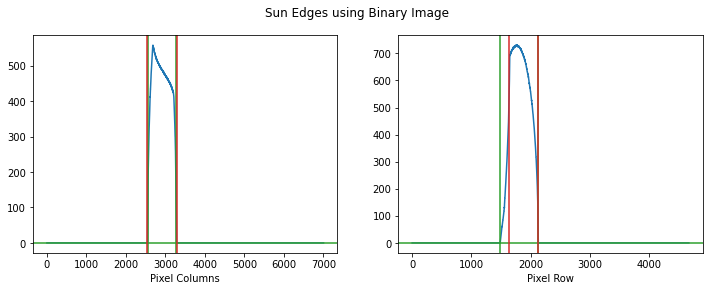

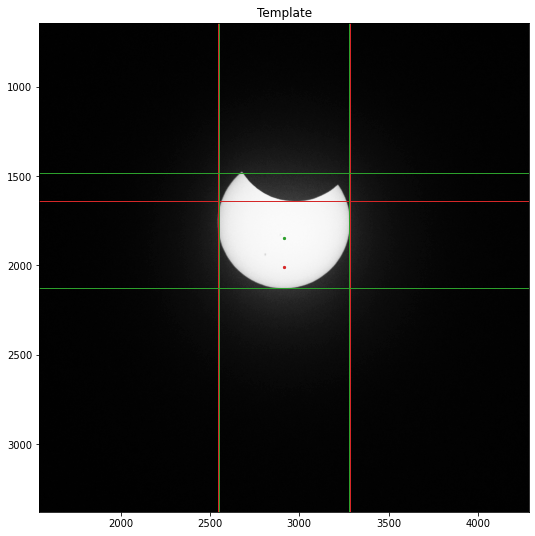

In [350]:
for f in img_files[::20]:
    img = cv2.imread(f)
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (
        H,
        W,
        C,
    ) = template.shape

    imgGray_masked = np.zeros_like(imgGray, dtype=np.int8)
    imgGray_masked[imgGray > np.percentile(imgGray, 99)] = 1

    fig, ax = plt.subplots(1, 2, figsize=(16, 9))
    ax[0].set_title("Image")
    ax[1].set_title("Image Binary")
    im = ax[0].imshow(imgGray, cmap="Greys_r", interpolation="none")
    plt.colorbar(im, ax=ax[0], shrink=0.5)
    im = ax[1].imshow(imgGray_masked, cmap="Greens", interpolation="none")
    plt.colorbar(im, ax=ax[1], shrink=0.5)
    plt.show()

    print("Using Image")

    sun_w1 = np.argmax(np.gradient(imgGray.sum(axis=0))) - 1
    sun_w2 = np.argmin(np.gradient(imgGray.sum(axis=0))) + 1
    sun_h1 = np.argmax(np.gradient(imgGray.sum(axis=1))) - 1
    sun_h2 = np.argmin(np.gradient(imgGray.sum(axis=1))) + 1
    print(sun_w2 - sun_w1, sun_h2 - sun_h1)
    sun_d = np.maximum(sun_w2 - sun_w1, sun_h2 - sun_h1)
    print(sun_d)
    sun_c = np.array([sun_h1 + sun_d / 2, sun_w1 + sun_d / 2], dtype=int)
    print(sun_c)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle("Sun Edges using Image Grads")
    ax[0].plot(np.arange(W), imgGray.sum(axis=0))
    ax[0].axhline(np.median(imgGray.sum(axis=0)), c="tab:red")

    ax[0].axvline(sun_w1, c="tab:red")
    ax[0].axvline(sun_w2, c="tab:red")
    ax[0].set_xlabel("Pixel Columns")

    ax[1].plot(np.arange(H), imgGray.sum(axis=1))
    ax[1].axhline(np.median(imgGray.sum(axis=0)), c="tab:red")

    ax[1].axvline(sun_h1, c="tab:red")
    ax[1].axvline(sun_h2, c="tab:red")
    ax[1].set_xlabel("Pixel Row")

    plt.show()

    print("Using Binary Image")

    sun_m_w1, sun_m_w2 = np.where(imgGray_masked.sum(axis=0) > 1)[0][[0, -1]]
    sun_m_h1, sun_m_h2 = np.where(imgGray_masked.sum(axis=1) > 1)[0][[0, -1]]

    print(sun_m_w2 - sun_m_w1, sun_m_h2 - sun_m_h1)
    sun_m_d = np.maximum(sun_m_w2 - sun_m_w1, sun_m_h2 - sun_m_h1)
    print(sun_m_d)
    sun_m_c = np.array([sun_m_h1 + sun_m_d / 2, sun_m_w1 + sun_m_d / 2], dtype=int)
    print(sun_m_c)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle("Sun Edges using Binary Image")
    ax[0].plot(np.arange(W), imgGray_masked.sum(axis=0))
    ax[0].axhline(np.median(imgGray_masked.sum(axis=0)), c="tab:green")

    ax[0].axvline(sun_m_w1, c="tab:green")
    ax[0].axvline(sun_m_w2, c="tab:green")

    ax[0].axvline(sun_w1, c="tab:red")
    ax[0].axvline(sun_w2, c="tab:red")
    ax[0].set_xlabel("Pixel Columns")

    ax[1].plot(np.arange(H), imgGray_masked.sum(axis=1))
    ax[1].axhline(np.median(imgGray_masked.sum(axis=0)), c="tab:green")

    ax[1].axvline(sun_m_h1, c="tab:green")
    ax[1].axvline(sun_m_h2, c="tab:green")

    ax[1].axvline(sun_h1, c="tab:red")
    ax[1].axvline(sun_h2, c="tab:red")
    ax[1].set_xlabel("Pixel Row")

    plt.show()

    stamp_size = int(sun_d / 2 + 1000)

    fig, ax = plt.subplots(1, 1, figsize=(9, 9))
    ax.set_title("Template")
    ax.imshow(
        imgGray,
        cmap="Greys_r",
    )
    ax.vlines([sun_w1, sun_w2], ymin=0, ymax=H, color="tab:red", lw=1)
    ax.hlines([sun_h1, sun_h2], xmin=0, xmax=W, color="tab:red", lw=1)
    ax.scatter(sun_c[1], sun_c[0], c="tab:red", marker="o", s=5)

    ax.vlines([sun_m_w1, sun_m_w2], ymin=0, ymax=H, color="tab:green", lw=1)
    ax.hlines([sun_m_h1, sun_m_h2], xmin=0, xmax=W, color="tab:green", lw=1)
    ax.scatter(sun_m_c[1], sun_m_c[0], c="tab:green", marker="o", s=5)

    ax.set_xlim(sun_c[1] - stamp_size, sun_c[1] + stamp_size)
    ax.set_ylim(sun_c[0] + stamp_size, sun_c[0] - stamp_size)

    plt.show()

    # break

# Using Circular Hough Transform

In [441]:
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from tqdm import tqdm

In [396]:
np.arange(737 - 10, 737 + 10, 2)

array([727, 729, 731, 733, 735, 737, 739, 741, 743, 745])

In [417]:
np.arange(sun_disk_rad - 5, sun_disk_rad + 5, 1)

array([363, 364, 365, 366, 367, 368, 369, 370, 371, 372])

  0%|          | 0/247 [00:00<?, ?it/s]

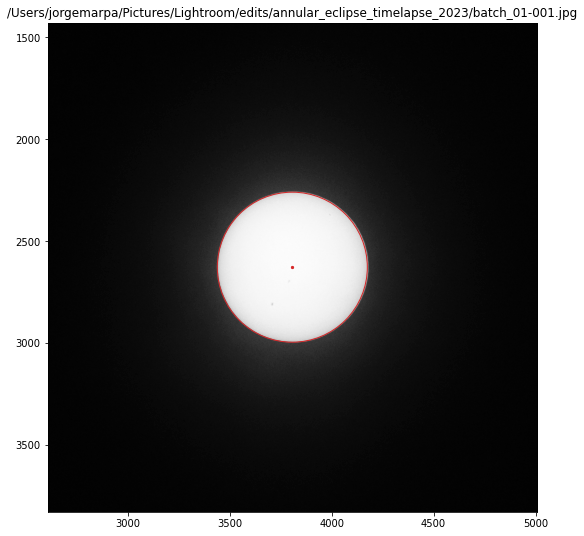

  4%|▍         | 10/247 [02:15<51:28, 13.03s/it] 

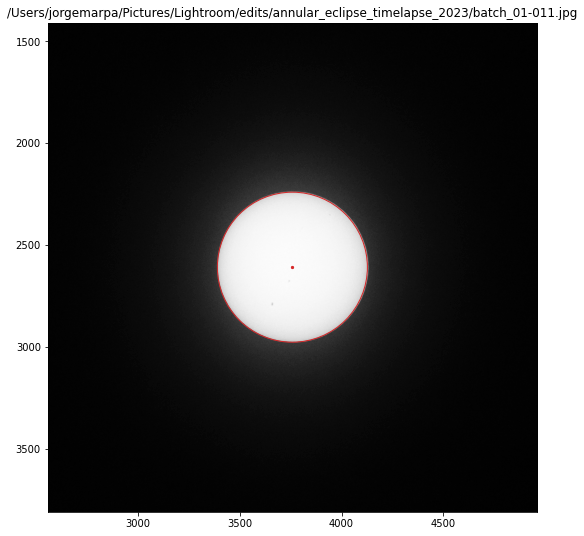

  8%|▊         | 20/247 [04:24<48:07, 12.72s/it]

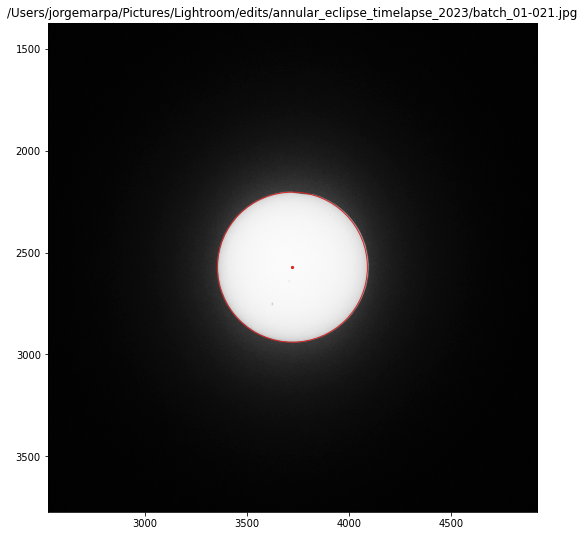

 12%|█▏        | 30/247 [06:32<45:57, 12.71s/it]

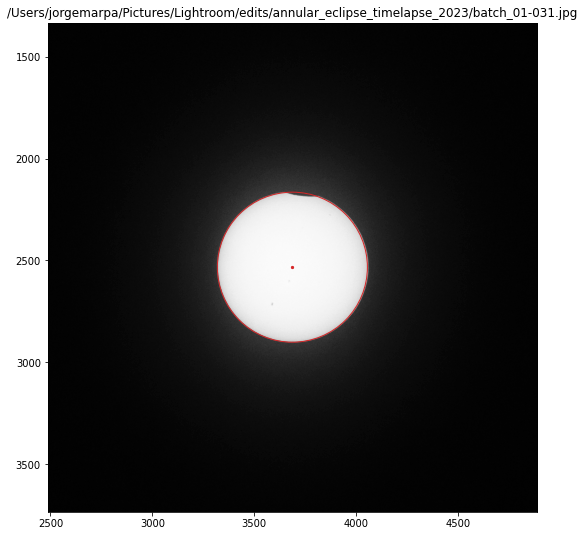

 16%|█▌        | 40/247 [08:39<43:38, 12.65s/it]

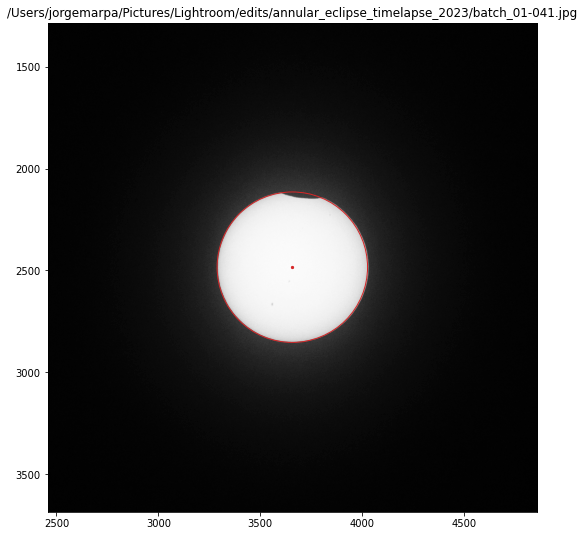

 20%|██        | 50/247 [10:45<41:06, 12.52s/it]

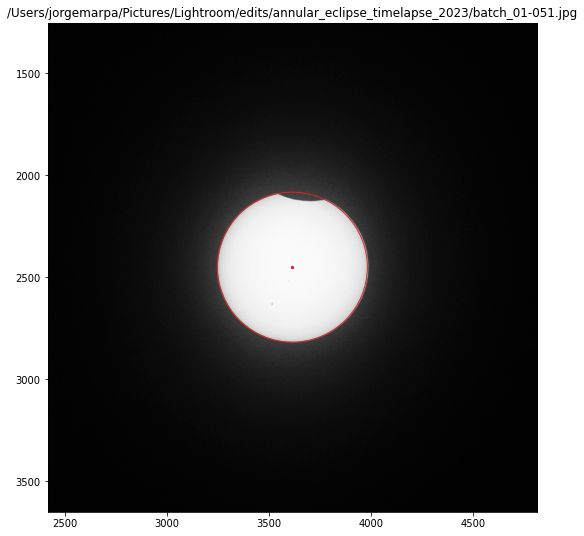

 24%|██▍       | 60/247 [12:53<39:25, 12.65s/it]

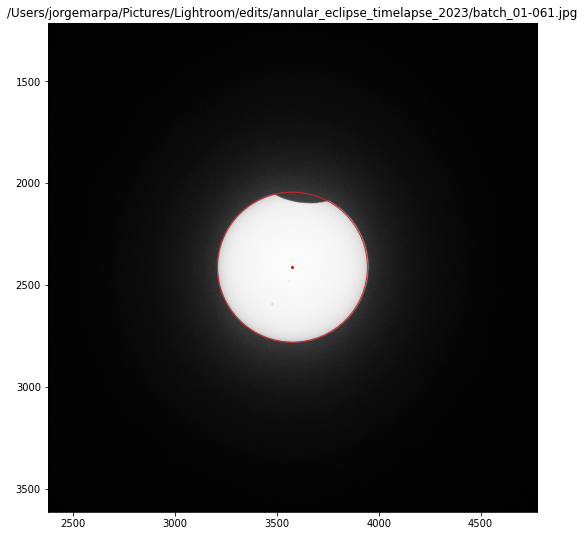

 28%|██▊       | 70/247 [14:59<37:11, 12.61s/it]

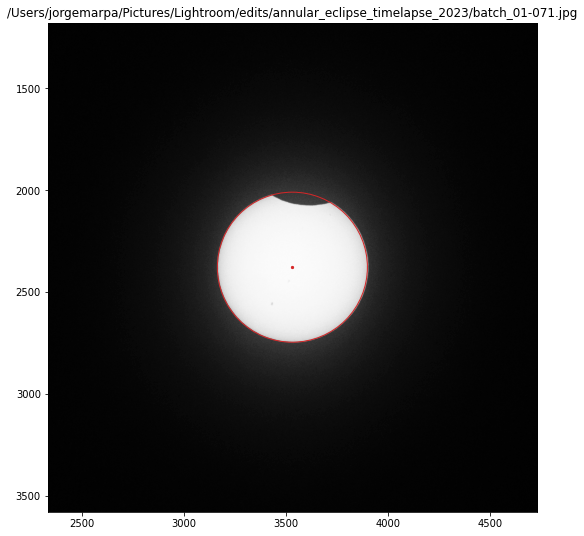

 32%|███▏      | 78/247 [16:42<36:06, 12.82s/it]

In [445]:
sun_disk_rad = int(737 / 2)
stamp_size = 1200

results = []

for k, f in tqdm(enumerate(img_files), total=len(img_files)):
    img = cv2.imread(f)
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (H, W, C) = img.shape

    # detect edges
    edges = canny(imgGray, sigma=2, low_threshold=1, high_threshold=50)

    # plt.figure(figsize=(9, 9))
    # im = plt.imshow(edges.astype(int), vmin=0, vmax=0.01, interpolation="none")
    # plt.colorbar(im, shrink=0.5)
    # plt.xlim(3000, 5000)
    # plt.ylim(3500, 1500)
    # plt.show()

    # Detect several radii
    hough_radii = np.arange(sun_disk_rad - 5, sun_disk_rad + 5, 1)
    hough_res = hough_circle(edges, hough_radii)

    # Select the most prominent 3 circles
    accums, cx, cy, radii = hough_circle_peaks(
        hough_res, hough_radii, total_num_peaks=1
    )

    results.append([cx[0], cy[0], radii[0], stamp_size])

    if k % 10 == 0:
        fig, ax = plt.subplots(1, 1, figsize=(9, 9))
        ax.set_title(f)
        ax.imshow(
            imgGray,
            cmap="Greys_r",
        )
        ax.scatter(cx, cy, c="tab:red", marker="o", s=5)
        for x_c, y_c, rad in zip(cx, cy, radii):
            patch = plt.Circle((x_c, y_c), rad, color="tab:red", fill=False)
            ax.add_patch(patch)

        ax.set_xlim(cx[0] - stamp_size, cx[0] + stamp_size)
        ax.set_ylim(cy[0] + stamp_size, cy[0] - stamp_size)
        plt.show()

    Xedges = [cx[0] - stamp_size, cx[0] + stamp_size]
    Yedges = [cy[0] - stamp_size, cy[0] + stamp_size]

    if Xedges[0] > 0 and Xedges[1] < W and Yedges[0] > 0 and Yedges[1] < H:
        stamp = img[
            cy[0] - stamp_size : cy[0] + stamp_size,
            cx[0] - stamp_size : cx[0] + stamp_size,
        ]
    else:
        stamp = img[
            np.max(cy[0] - stamp_size, 0) : np.min(cy[0] + stamp_size, H),
            np.max(cx[0] - stamp_size, 0) : np.min(cx[0] + stamp_size, W),
        ]

        padleft = np.abs(Xedges[0])
        padright = np.abs(Xedges[1] - W)
        padtop = np.abs(Yedges[0])
        padbottom = np.abs(Yedges[1] - H)

        padded_image = cv2.copyMakeBorder(
            stamp, padtop, padbottom, padleft, padright, cv2.BORDER_CONSTANT, value=0
        )

    out_f = f"../data/stamps/{os.path.basename(f).replace('batch', 'stamp_batch')}"
    cv2.imwrite(out_f, stamp, [cv2.IMWRITE_JPEG_QUALITY, 100])

    # break

results = np.array(results)

In [ ]:
(
    ffmpeg.input(
        f"../data/stamps/*jpg",
        pattern_type="glob",
        framerate=24,
    )
    .filter("deflicker", mode="pm", size=10)
    .filter("scale", size="hd1080", force_original_aspect_ratio="increase")
    .output(
        "../data/eclipse_time_lapse.mp4", crf=20, preset="slower", movflags="faststart", pix_fmt="yuv420p"
    )
    .view(filename="filter_graph")
    .run()
)

# Using OpwenCV Euclidean Motion

In [196]:
# https://learnopencv.com/image-alignment-ecc-in-opencv-c-python/

# MOTION_TRANSLATION
# MOTION_EUCLIDEAN
# MOTION_AFFINE
# MOTION_HOMOGRAPHY


aligned, warp_matrix = eccAlign(
    image,
    template,
    number_of_iterations=5000,
    termination_eps=1e-9,
    warp_mode=cv2.MOTION_EUCLIDEAN,
)

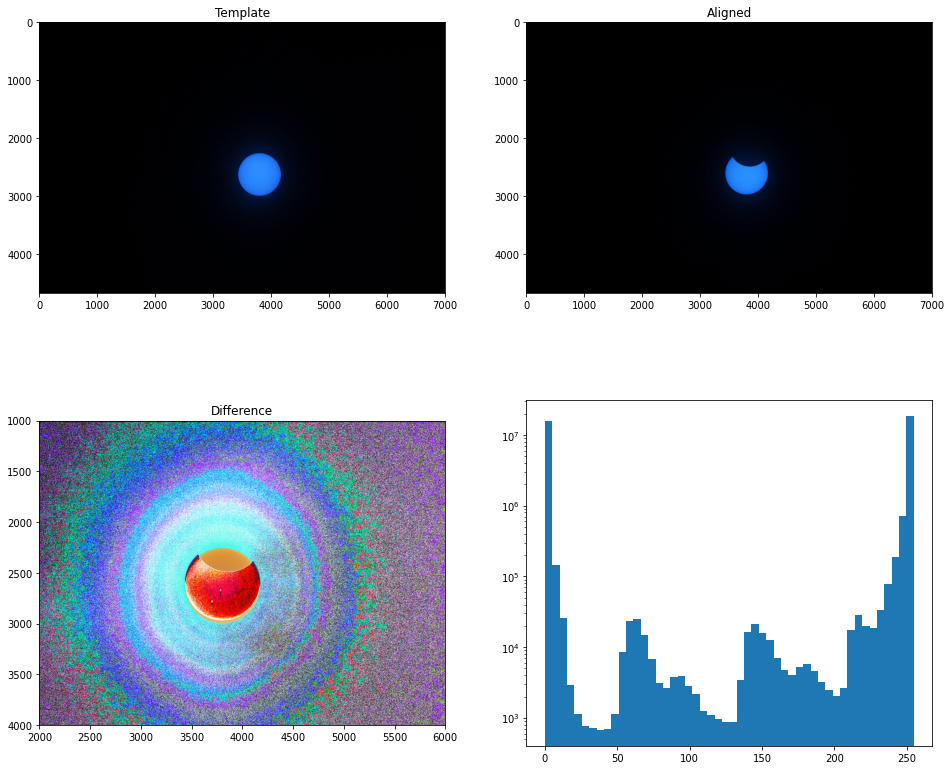

In [197]:
fig, ax = plt.subplots(2, 2, figsize=(16, 14))
ax[0, 0].set_title("Template")
ax[0, 1].set_title("Aligned")
ax[1, 0].set_title("Difference")
ax[0, 0].imshow(template, cmap="Greys_r")
ax[0, 1].imshow(aligned, cmap="Greys_r")
ax[1, 0].imshow(aligned - template, cmap="Greys_r")
ax[1, 0].set_xlim(2000, 6000)
ax[1, 0].set_ylim(4000, 1000)
ax[1, 1].hist((aligned - template)[1000:4000, 2000:6000].ravel(), bins=50, log=True)
plt.show()